<a href="https://colab.research.google.com/github/aizazaziz/Python_Projects/blob/master/Finance_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel("AdvancedDataset.xlsx", sheet_name="Finance_Banking", engine='openpyxl')
df.head()

,Date,Customer_ID,Transaction_Amount,Transaction_Type,Loan_Amount,Default_Flag,Risk_Score
0,2022-01-01,5789,4416,Credit,283069,0,657
1,2022-01-02,3146,4001,Transfer,301052,0,476
2,2022-01-03,2725,1442,Transfer,189511,1,761
3,2022-01-04,6005,12866,Transfer,115143,1,644
4,2022-01-05,6425,10731,Transfer,378992,0,619


In [ ]:
# Convert Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Encode Transaction Type
df = pd.get_dummies(df, columns=['Transaction_Type'], drop_first=True)


In [ ]:
X = df.drop(columns=['Default_Flag', 'Date'])
y = df['Default_Flag']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9029166666666667
[[2167    0]
 [ 233    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2167
           1       0.00      0.00      0.00       233

    accuracy                           0.90      2400
   macro avg       0.45      0.50      0.47      2400
weighted avg       0.82      0.90      0.86      2400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


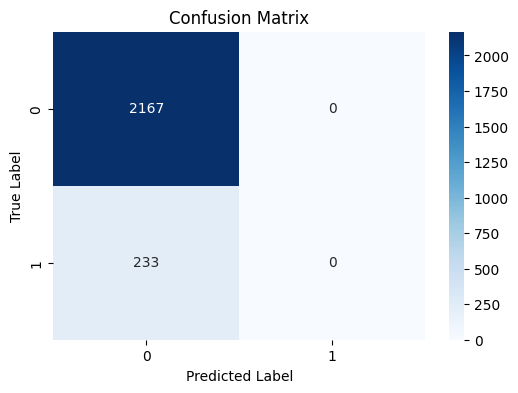

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = [[2167, 0],
      [233, 0]]

labels = [0, 1]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


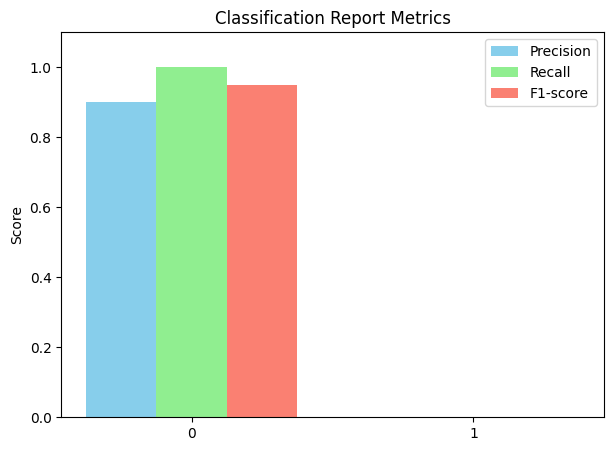

In [ ]:
import numpy as np

# Metrics for each class
classes = ['0', '1']
precision = [0.90, 0.00]
recall = [1.00, 0.00]
f1 = [0.95, 0.00]

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(7,5))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1, width, label='F1-score', color='salmon')

plt.xticks(x, classes)
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.ylim(0, 1.1)
plt.legend()
plt.show()


In [ ]:
import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


,0
Transaction_Amount,0.201153
Loan_Amount,0.200771
Customer_ID,0.192606
Risk_Score,0.172893
Year,0.113862
Month,0.081969
Transaction_Type_Debit,0.019878
Transaction_Type_Transfer,0.016868


In [ ]:
df['Default_Prediction'] = model.predict(X)
df['Default_Probability'] = model.predict_proba(X)[:, 1]


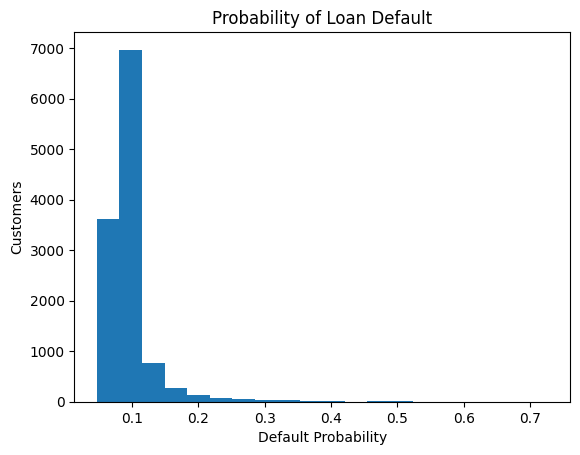

In [ ]:

plt.hist(df['Default_Probability'], bins=20)
plt.title("Probability of Loan Default")
plt.xlabel("Default Probability")
plt.ylabel("Customers")
plt.show()


In [ ]:
df.to_csv("Bank_Default_Predictions.csv", index=False)
